In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Load pre-trained ResNet18 model
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Modify the last fully connected layer for CIFAR-10 (10 classes)
model.fc = torch.nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# Set model to evaluation mode
model.eval()

# Evaluation
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of ResNet18 on CIFAR-10 test images: {accuracy:.2f}%')

Files already downloaded and verified
Accuracy of ResNet18 on CIFAR-10 test images: 9.29%


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.0604, Test Accuracy: 71.98%
Epoch 2/10, Loss: 0.7221, Test Accuracy: 79.41%
Epoch 3/10, Loss: 0.6245, Test Accuracy: 77.35%
Epoch 4/10, Loss: 0.5726, Test Accuracy: 81.67%
Epoch 5/10, Loss: 0.5411, Test Accuracy: 81.51%
Epoch 6/10, Loss: 0.5014, Test Accuracy: 80.53%
Epoch 7/10, Loss: 0.4713, Test Accuracy: 83.24%
Epoch 8/10, Loss: 0.4540, Test Accuracy: 82.19%
Epoch 9/10, Loss: 0.4314, Test Accuracy: 82.87%
Epoch 10/10, Loss: 0.4150, Test Accuracy: 82.62%


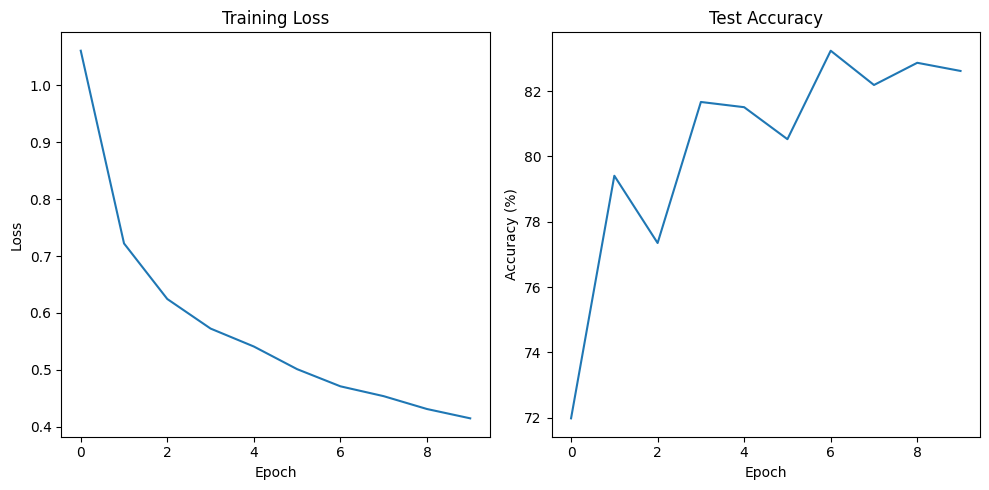

Final accuracy of ResNet18 on CIFAR-10 test images: 82.62%


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Load pre-trained ResNet18 model
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Modify the last fully connected layer for CIFAR-10 (10 classes)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

# Training
epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(trainloader))

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Test Accuracy: {accuracy:.2f}%')

# Save the model weights
torch.save(model.state_dict(), 'resnet18_cifar10.pth')

# Plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.savefig('training_plot.png')
plt.show()

# Final evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

final_accuracy = 100 * correct / total
print(f'Final accuracy of ResNet18 on CIFAR-10 test images: {final_accuracy:.2f}%')